### Implementation of K-means method. It returns a dict containing cluster points, an array containg cluster mean vectors

In [ ]:
import pandas as pd
import numpy as np
import random

def kmeans(input_array, k, means):

  n_samples = input_array.shape[0]
  n_features = input_array.shape[1]

  mean_vectors = means[0:k, :].copy()
  clusters = {} #clusters dict
  for i in range(k):
    clusters[str(i)] = []

  clusters['labels'] = np.full(n_samples, -1)

  iterations = 300
  while iterations > 0:
    for j in range(k):
      clusters[str(j)] = [] #clear the points in clusters at the start of iteration

    clusters['labels'] = np.full(n_samples, -1)

    for i in range(len(input_array)):

      distance = []
      for l in range(k):
        distance_l = np.sum((input_array[i] - mean_vectors[l]) ** 2, axis=0)
        distance.append(distance_l)

      new_cluster_index = np.argmin(distance)
      clusters[str(new_cluster_index)].append(input_array[i])
      clusters['labels'][i] = new_cluster_index + 1

    mean_vectors_old = mean_vectors.copy()
    for c in range(k):
        mean = np.mean(np.array(clusters[str(c)]), axis=0)
        mean_vectors[c] = mean

    iterations -= 1
    if np.all(mean_vectors_old == mean_vectors):
        break
        
  return clusters, mean_vectors

### Clustering using the above K-means method for a fixed initialization and k = {2, 3, 4, 5}

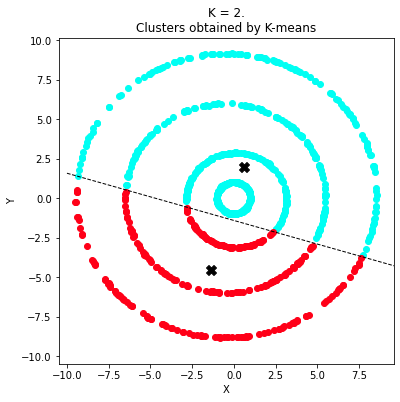

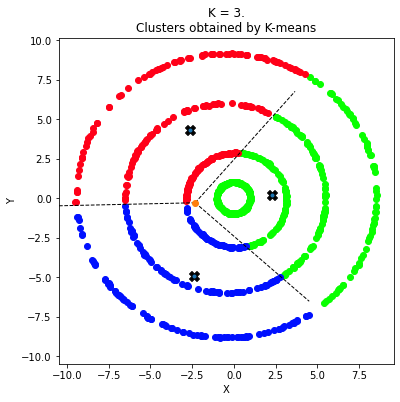

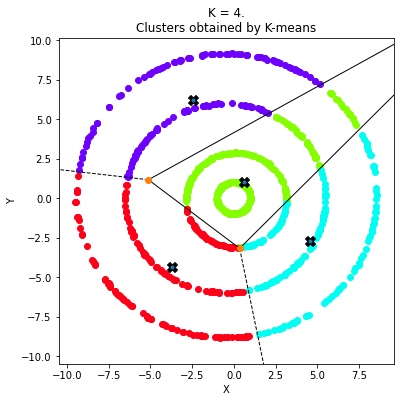

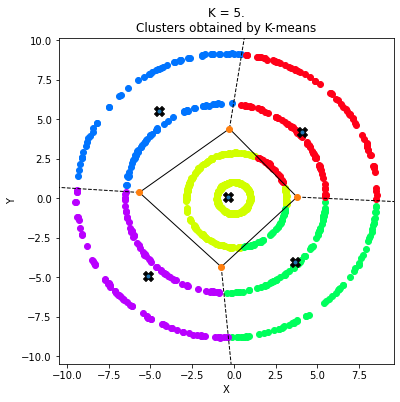

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d 

df = pd.read_csv("/content/Dataset.csv", names=['x', 'y'])

input_data_set = df.iloc[:, :].values

max_vals = np.amax(input_data_set, axis=0)
min_vals = np.amin(input_data_set, axis=0)

#print(max_vals[0], max_vals[1], min_vals[0], min_vals[1])

num_data_points = input_data_set.shape[0]

#Fix a random initialization of means
random_index = np.random.choice(num_data_points, 5, replace=False)
init_means = input_data_set[random_index] #Collect 5 means

for loop in range(4):

  num_clusters = loop + 2;
  cluster_dicts, means = kmeans(input_data_set, num_clusters, init_means)

  cmp = plt.cm.get_cmap('hsv', num_clusters + 1)
  plt.figure(figsize=(6,6))

  plt.title("K = " + str(num_clusters)+ ".\nClusters obtained by K-means")
  plt.xlabel("X")
  plt.ylabel("Y")
  for i in range(num_clusters):
    cluster_points = np.array(cluster_dicts[str(i)])
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=[cmp(i + 1)])

    cluster_center = means[i]
    plt.scatter(cluster_center[0],cluster_center[1],color="black",marker="X", s=100)

  if num_clusters == 2 :
    from sympy import Point, Segment, Line
    s1 = Segment(Point(means[0][0], means[0][1]), Point(means[1][0], means[1][1]))
    bisector = s1.perpendicular_bisector()

    p1 = bisector.intersection(Line(Point(-10,0), Point(-10, 10)))[0]
    p2 = bisector.intersection(Line(Point(10,0), Point(10, 10)))[0]

    plt.plot(np.array([p1.coordinates[0], p2.coordinates[0]]), np.array([p1.coordinates[1], p2.coordinates[1]]), c='black', ls='--', lw=1)
  else :  
    vor = Voronoi(means) 
    voronoi_plot_2d(vor, plt.gca()) 

  plt.xlim([min_vals[0] - 1, max_vals[0] + 1])
  plt.ylim([min_vals[0] - 1, max_vals[1] + 1])
  #plt.grid()
  plt.show()